# Credit card Approval Prediction

Credit card approval prediction using machine learning involves several steps. First, the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn are imported. The credit card approval dataset is loaded and explored to understand the data. Preprocessing steps like handling missing values, handling imbalanced data, and encoding categorical variables are performed. Feature engineering techniques like creating new features and scaling features are applied to enhance the model's predictive power.

Next, the data is split into training and test sets using the train_test_split function from Scikit-learn. Several machine learning models including Logistic Regression, Decision Tree Classifier, XGBoost Classifier, CatBoost Classifier, RandomForest Classifier, and SGD Classifier are initialized and trained on the training set.

Model performance is evaluated using accuracy score and confusion matrix. The accuracy score measures the overall accuracy of the model's predictions, while the confusion matrix shows the count of true positive, true negative, false positive, and false negative predictions, allowing for further analysis of model performance.

In [122]:
#Importing required libraries
%matplotlib inline

import numpy as np
import pandas as pd   # Pandas

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler  #Handle imbalanced data
from collections import Counter
from sklearn.preprocessing import LabelEncoder #Use LabelEncoder to encode categorical variables into numeric values, which can be fed into the machine learning models

import itertools
import missingno as msno # Use msno library to visualize and handle missing values in your dataset

# Libraries for selecting best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Libraries for Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Libraries for Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

#library for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [56]:
#reading the data
application_data = pd.read_csv("credit_data/application_record.csv", encoding = 'utf-8') 
record_data = pd.read_csv("credit_data/credit_record.csv", encoding = 'utf-8')

### Analysing the data

In [57]:
#displaying the application data
application_data 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [58]:
#displaying the record data
record_data

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [59]:
print("Info of application data",application_data.info(),"\n")
print("Info of record data",record_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Merge into a single dataframe for analysing

> Here In record data we have 3 months, so we consider merging them into application_data.The Status is first considered and converted into whether the due is more than 2 months are not.If more, the users risk will be 1 else 0

> Similarly, The months balance of the same id is considered and onl;y take the aggregate minimum of all the values.

In [60]:
record_data['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [61]:
record_data['user_risk'] = None
record_data['user_risk'][record_data['STATUS'] =='2']='Yes' 
record_data['user_risk'][record_data['STATUS'] =='3']='Yes' 
record_data['user_risk'][record_data['STATUS'] =='4']='Yes' 
record_data['user_risk'][record_data['STATUS'] =='5']='Yes'


In [62]:
cumulative_month=record_data.groupby('ID').count()
cumulative_month['user_risk'][cumulative_month['user_risk'] > 0]='Yes' 
cumulative_month['user_risk'][cumulative_month['user_risk'] == 0]='No' 
cumulative_month = cumulative_month[['user_risk']]
# find all users' account open month.
starting_month=pd.DataFrame(record_data.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
starting_month=starting_month.rename(columns={'MONTHS_BALANCE':'starting_month'}) 
merged_data=pd.merge(application_data,starting_month,how="left",on="ID") #merge to record data

merged_data=pd.merge(merged_data,cumulative_month,how='inner',on='ID')
merged_data['target']=merged_data['user_risk']
merged_data.loc[merged_data['target']=='Yes','target']=1
merged_data.loc[merged_data['target']=='No','target']=0

In [63]:
merged_data.sample(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,starting_month,user_risk,target
27882,5115492,M,Y,Y,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1382,1,0,0,0,Laborers,4.0,-37.0,No,0
15559,5062320,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-9482,1,0,0,0,Core staff,1.0,-23.0,No,0
15755,5062582,F,Y,Y,0,360000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,-2997,1,0,0,0,Accountants,2.0,-54.0,No,0
381,5009275,M,N,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,-2443,1,0,1,0,Laborers,2.0,-29.0,No,0
3526,5023213,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2243,1,0,0,0,Drivers,2.0,-16.0,No,0
21931,5091301,M,N,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1508,1,0,0,0,Drivers,3.0,-32.0,No,0
31124,5126572,M,N,N,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-9389,1,0,0,0,Laborers,2.0,-13.0,No,0
19748,5088191,F,Y,N,0,90000.0,Pensioner,Higher education,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-6.0,No,0
31185,5126648,F,N,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-135,1,1,1,0,NaN,3.0,-3.0,No,0
8594,5037197,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-7.0,No,0


### Data Cleaning

Finding the missing or null value columns

In [64]:
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,starting_month,user_risk,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [65]:
#rename the columns that are feasible to work 
merged_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Own_CAR','FLAG_OWN_REALTY':'Own_Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'income',
                         'NAME_EDUCATION_TYPE':'education','NAME_FAMILY_STATUS':'fam_status',
                        'NAME_HOUSING_TYPE':'housing','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inc_type','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occupation','DAYS_BIRTH':'age','DAYS_EMPLOYED':'employment_days'
                        },inplace=True)

In [66]:
merged_data.shape

(36457, 21)

In [67]:
merged_data.columns


Index(['ID', 'Gender', 'Own_CAR', 'Own_Reality', 'ChldNo', 'income',
       'inc_type', 'education', 'fam_status', 'housing', 'age',
       'employment_days', 'FLAG_MOBIL', 'wkphone', 'phone', 'email',
       'occupation', 'famsize', 'starting_month', 'user_risk', 'target'],
      dtype='object')

<AxesSubplot:>

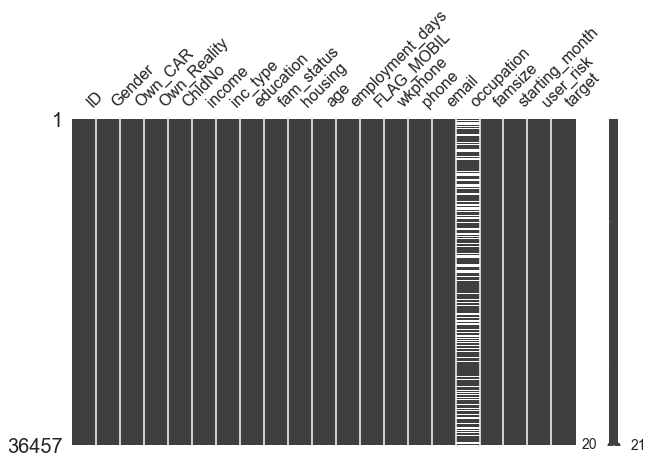

In [68]:
#visualize the null values using missingno library
msno.matrix(merged_data, figsize=(10,6))

This shows that there are null values only in occupation.If there are too many, we will drop the column or else replace with the most common value

In [69]:
merged_data.isna().sum()

ID                     0
Gender                 0
Own_CAR                0
Own_Reality            0
ChldNo                 0
income                 0
inc_type               0
education              0
fam_status             0
housing                0
age                    0
employment_days        0
FLAG_MOBIL             0
wkphone                0
phone                  0
email                  0
occupation         11323
famsize                0
starting_month         0
user_risk              0
target                 0
dtype: int64

This shows that there are 11323 NAN values.Hence drop the feature

In [70]:
merged_data=merged_data.drop(["occupation","FLAG_MOBIL"], axis=1)

In [71]:
#check wghether there are any more
merged_data.isna().sum()

ID                 0
Gender             0
Own_CAR            0
Own_Reality        0
ChldNo             0
income             0
inc_type           0
education          0
fam_status         0
housing            0
age                0
employment_days    0
wkphone            0
phone              0
email              0
famsize            0
starting_month     0
user_risk          0
target             0
dtype: int64

<AxesSubplot:>

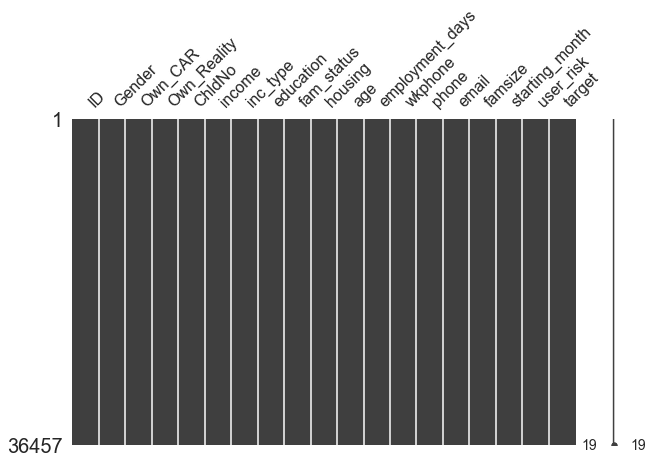

In [72]:
msno.matrix(merged_data, figsize=(10,6))

In [73]:
#drop duplicate rows by keeping only the last row in repeated ones
merged_data = merged_data.drop_duplicates(keep='last')
print(merged_data.shape)

(36457, 19)


In [74]:
# Finding the unique values in each column of the dataset
for col in merged_data.columns:
  print(col,  "unique_val" ,merged_data[col].unique(), len(merged_data[col].unique()))


ID unique_val [5008804 5008805 5008806 ... 5149838 5150049 5150337] 36457
Gender unique_val ['M' 'F'] 2
Own_CAR unique_val ['Y' 'N'] 2
Own_Reality unique_val ['Y' 'N'] 2
ChldNo unique_val [ 0  1  3  2  4  5 14 19  7] 9
income unique_val [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   1

### DATA VISULAIZATIONS

1. countplot :-
The countplot is used to represent the occurrence of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

2. pairplot :- To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.
3. scatterplot:-  scatterplot is a type of data display that shows the relationship between two numerical variables
4. Heatmap:-Heatmaps are a method of representing data graphically where values are depicted by color, making it easy to visualize complex data and understand it at a glance.Mostly used to find the correlation between the column values

#### Countplot for target variable

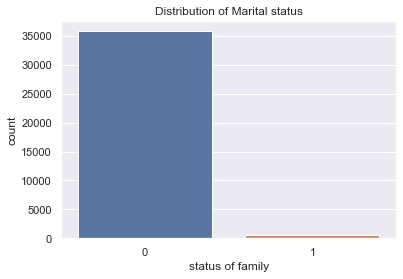

In [75]:

# Create countplot
sns.set(style="darkgrid")
ax=sns.countplot(x= merged_data["target"])


# Set labels and title
ax.set_xlabel("status of family")
ax.set_ylabel("count")
ax.set_title("Distribution of Marital status")

# Show the plot
plt.show()

Target 0 (credit card approved) count is very large compared to target 1(credit card refuged)

#### Pairplot for all features 


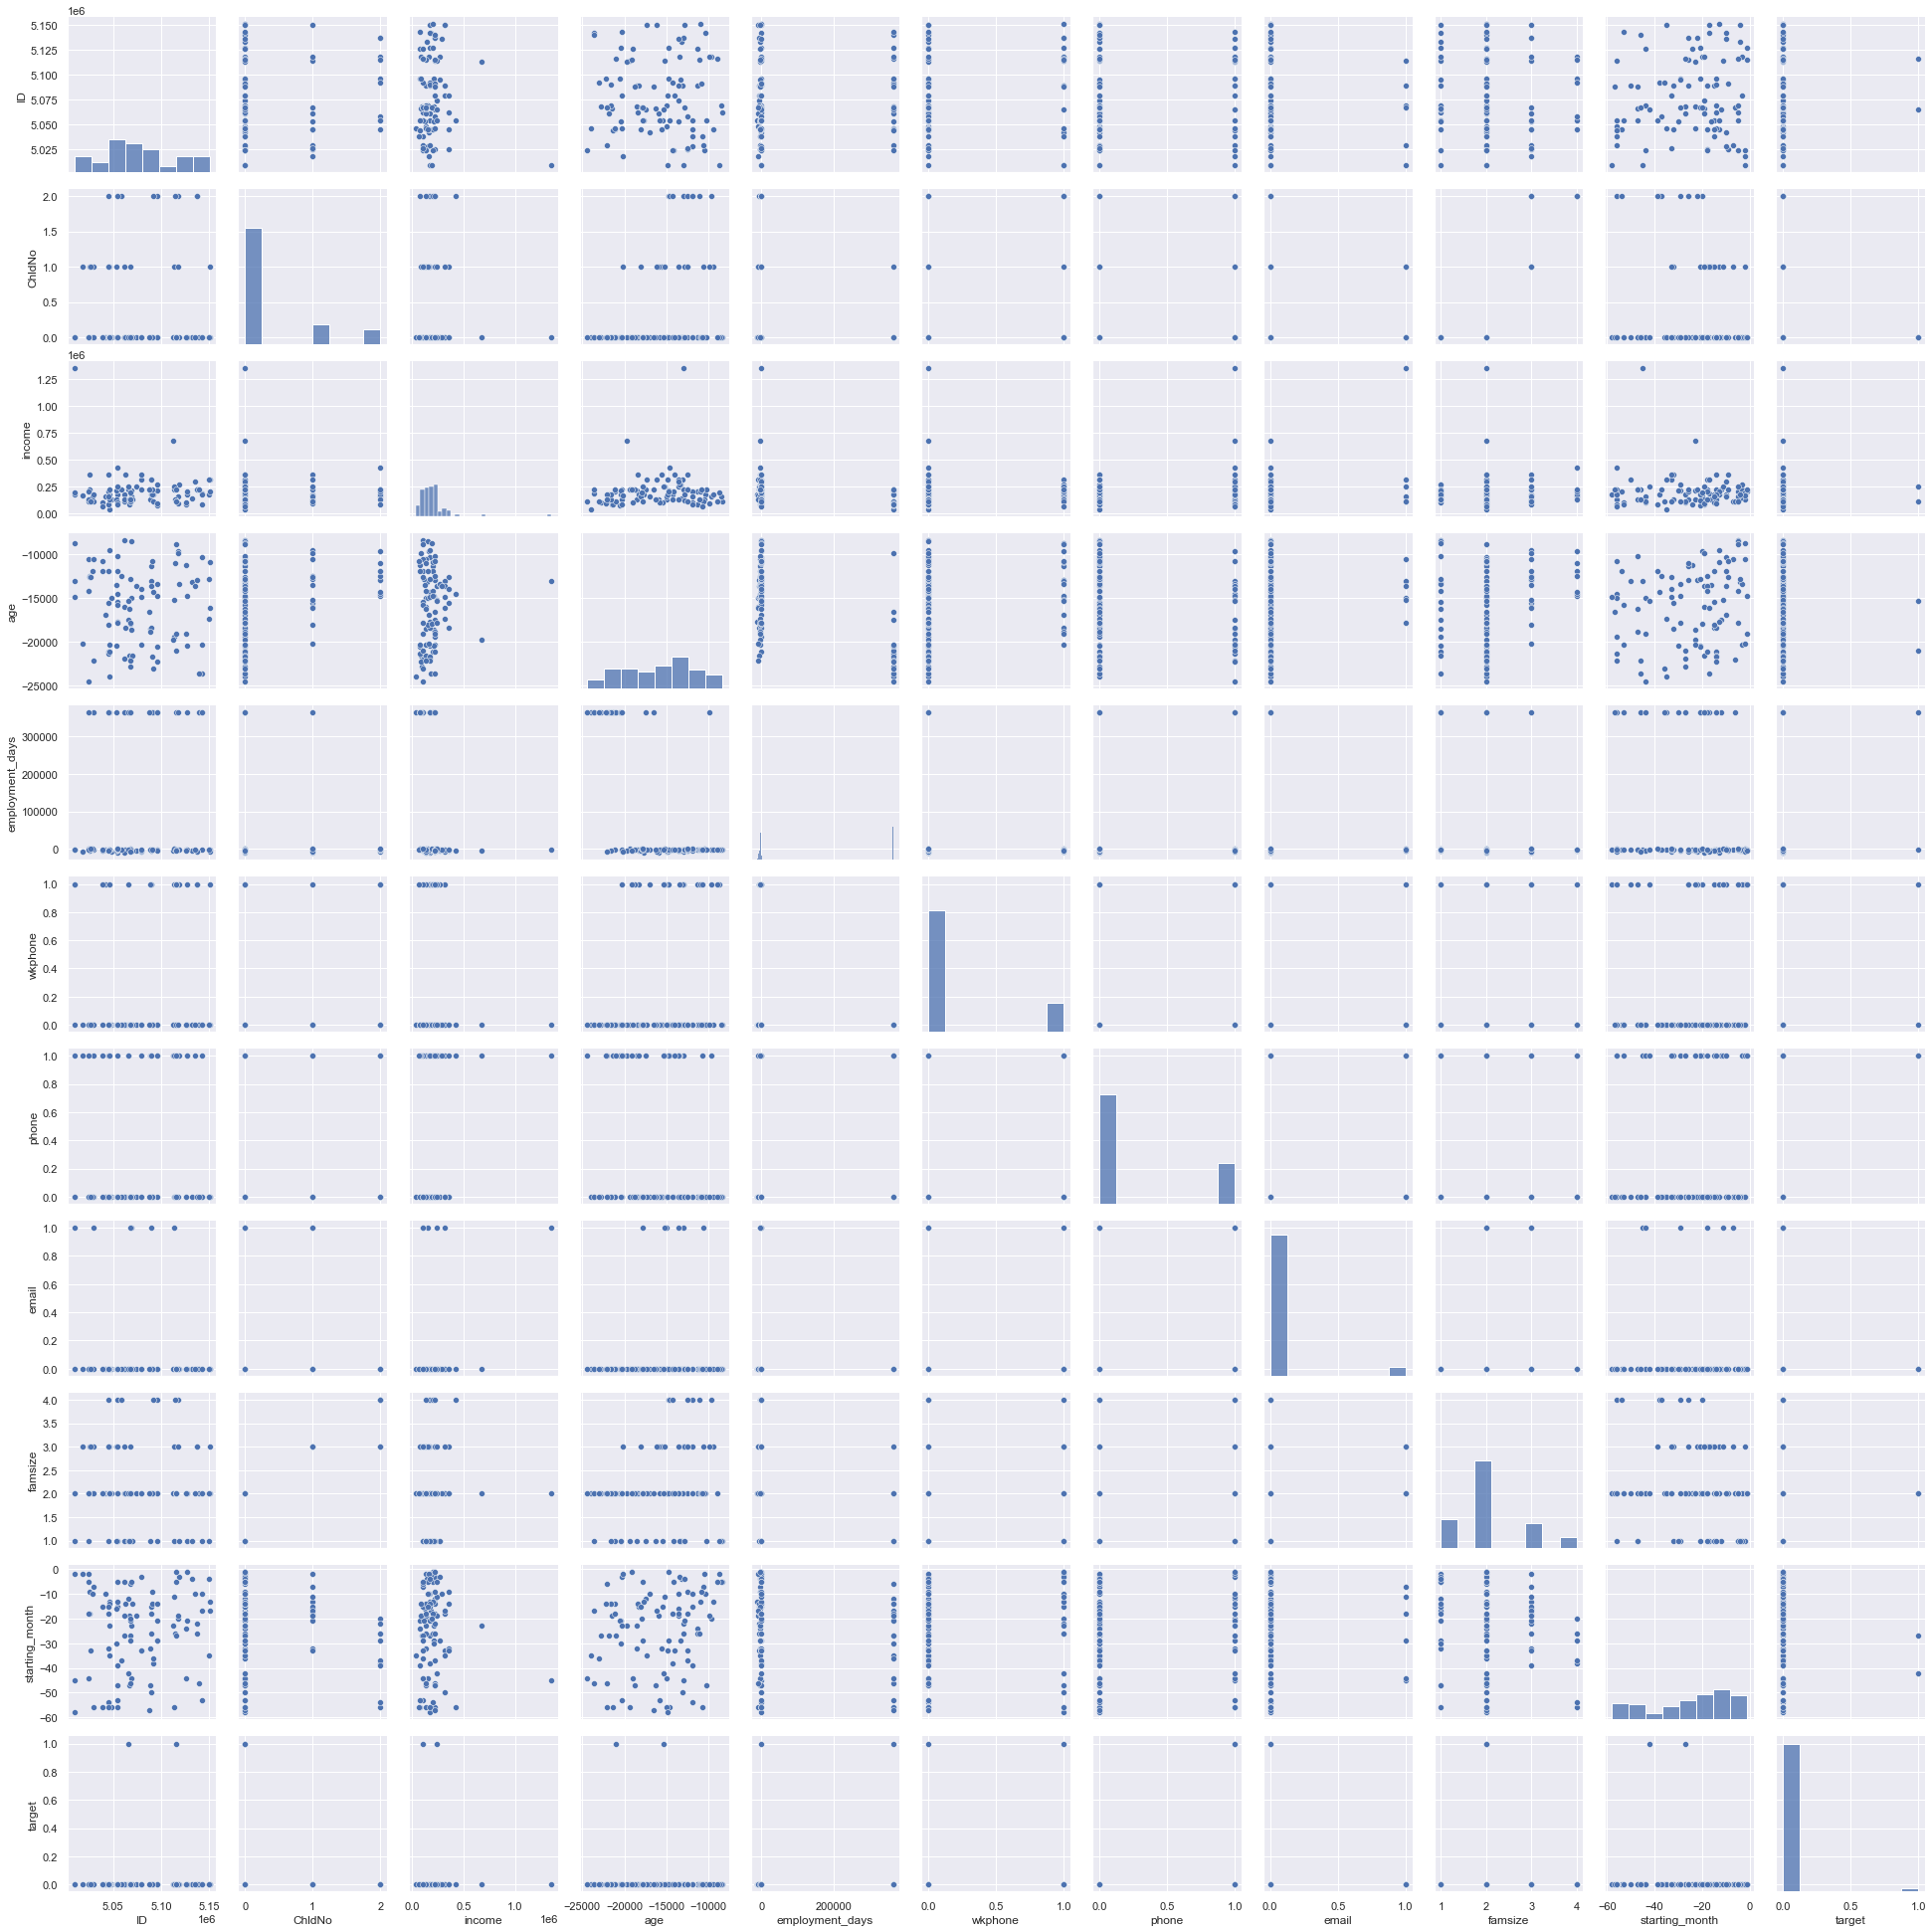

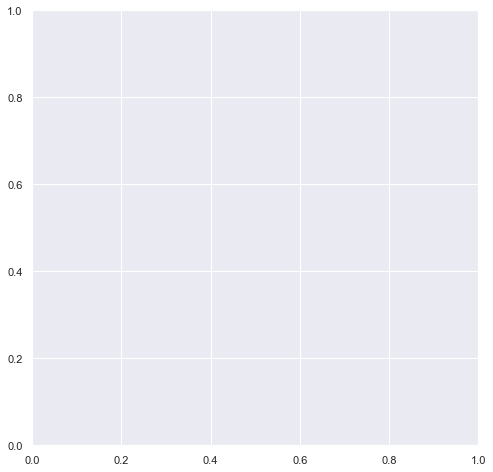

In [76]:
sns.color_palette("Paired")
sns.pairplot(merged_data.sample(100))
fig, ax= plt.subplots(figsize=(8,8))
plt.show()

#### Countplot for Family status along with target variable

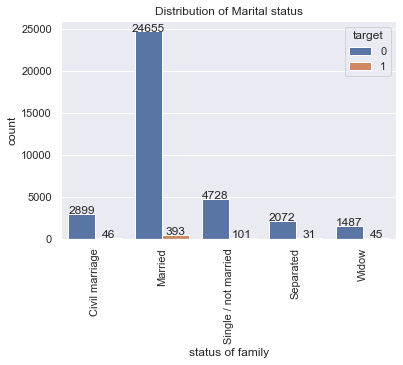

In [77]:
# Create countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="fam_status", data=merged_data,hue='target')

# Add count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() /2. , height), ha='center', va='baseline')

# Set labels and title
ax.set_xlabel("status of family")
ax.set_ylabel("count")
ax.set_title("Distribution of Marital status")
plt.xticks(rotation=90)
# Show the plot
plt.show()

#### Countplot for Education status along with target variable

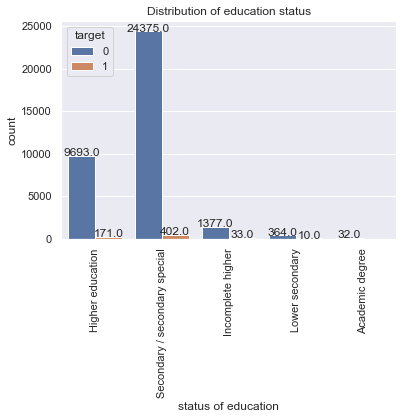

In [78]:

# Create countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="education", data=merged_data,hue='target')

# Add count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Set labels and title
ax.set_xlabel("status of education")
ax.set_ylabel("count")
ax.set_title("Distribution of education status")
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Countplot for Housing status of applicants along with target variable

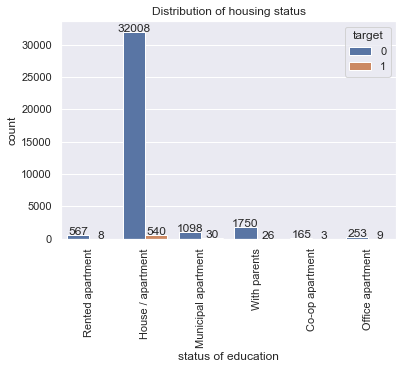

In [79]:


# Create countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="housing", data=merged_data,hue='target')

# Add count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Set labels and title
ax.set_xlabel("status of education")
ax.set_ylabel("count")
plt.title('Distribution of housing status')
plt.xticks(rotation=90)

# Show the plot
plt.show()



#### Countplot for Family Size upto 5 along with target variable

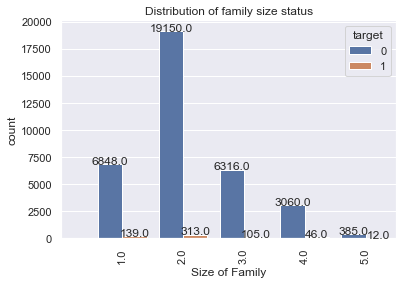

In [80]:


# Create countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="famsize", data=merged_data,hue='target')

# Add count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Set labels and title
ax.set_xlabel("Size of Family")
ax.set_ylabel("count")
ax.set_title("Distribution of family size status")
plt.xticks(rotation=90)
plt.xlim(-1, 4.5)
# Show the plot
plt.show()



#### Scatterplot for income of applicants and their approval status

<AxesSubplot:xlabel='target', ylabel='income'>

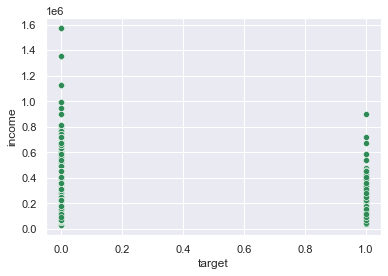

In [81]:
sns.scatterplot(x='target', y='income', data=merged_data,  color= 'seagreen')

> This scatter plot shows that most of the applicnts either approved or rejected irrespective of income unless their income is too high

#### Scatterplot for Education status of applicants and their approval status

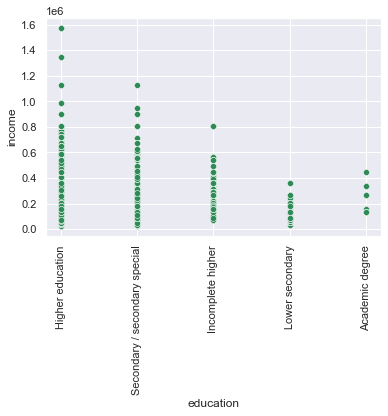

In [82]:
sns.scatterplot(x='education', y='income', data=merged_data,  color= 'seagreen')
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Feature Engineering

##### Dropping the unnecessary features

In [83]:
all_data=merged_data

In [84]:
all_data

,ID,Gender,Own_CAR,Own_Reality,ChldNo,income,inc_type,education,fam_status,housing,age,employment_days,wkphone,phone,email,famsize,starting_month,user_risk,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1.0,-26.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,2.0,-9.0,Yes,1


In order to deal with categorical data , we can either replace or get dummies and later delete the repeated columns

In [86]:
# Dealing with categorical values
merged_data= pd.get_dummies(merged_data,columns=['Gender', 'user_risk','Own_CAR', 'Own_Reality','inc_type','education','fam_status','housing'])


merged_data


,ID,ChldNo,income,age,employment_days,wkphone,phone,email,famsize,starting_month,...,fam_status_Married,fam_status_Separated,fam_status_Single / not married,fam_status_Widow,housing_Co-op apartment,housing_House / apartment,housing_Municipal apartment,housing_Office apartment,housing_Rented apartment,housing_With parents
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-15.0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,0,427500.0,-12005,-4542,1,0,0,2.0,-14.0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,0,112500.0,-21474,-1134,0,0,0,2.0,-29.0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,270000.0,-19110,-3051,0,1,1,1.0,-4.0,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,270000.0,-19110,-3051,0,1,1,1.0,-26.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,0,0,0,2.0,-11.0,...,1,0,0,0,0,1,0,0,0,0
36453,5149834,0,157500.0,-12387,-1325,0,1,1,2.0,-23.0,...,1,0,0,0,0,1,0,0,0,0
36454,5149838,0,157500.0,-12387,-1325,0,1,1,2.0,-32.0,...,1,0,0,0,0,1,0,0,0,0
36455,5150049,0,283500.0,-17958,-655,0,0,0,2.0,-9.0,...,1,0,0,0,0,1,0,0,0,0


In [87]:
#Delete the repeated columns
merged_data=merged_data.drop(['Gender_F','Own_CAR_N','user_risk_No','Own_Reality_N','starting_month','famsize','housing_Co-op apartment','housing_Office apartment','education_Academic degree'],axis=1)


In [88]:
# Finding the unique values ion each column of the dataset
for col in merged_data.columns:
  print(col,  "unique_val" ,merged_data[col].unique(), len(merged_data[col].unique()))

ID unique_val [5008804 5008805 5008806 ... 5149838 5150049 5150337] 36457
ChldNo unique_val [ 0  1  3  2  4  5 14 19  7] 9
income unique_val [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.   432000.   257625.   143100.   207000.
  288000.   131400.

##### Selecting best features

>> For selecting best features we are using the built in  SelectKBest module and finding the best features that fit

In [89]:
data = merged_data
X = merged_data.drop(['target'],axis = 1)  #independent variable columns
y=merged_data.target

In [92]:
#extracting top 7 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #printing 15 best features

                                      Specs      Score
9                             user_risk_Yes        inf
11                            Own_Reality_Y  18.051045
25                         fam_status_Widow  14.992084
0                                        ID   8.860648
8                                  Gender_M   8.527284
13                       inc_type_Pensioner   7.991072
22                       fam_status_Married   7.017726
27              housing_Municipal apartment   6.592949
24          fam_status_Single / not married   5.412228
14                   inc_type_State servant   3.965934
18              education_Incomplete higher   3.739535
19                education_Lower secondary   2.203244
20  education_Secondary / secondary special   2.101792
26                housing_House / apartment   1.708175
4                           employment_days   1.169450
5                                   wkphone   1.159773
16                         inc_type_Working   0.948533
10        

##### Selecting those top 7 best features and then training and testing on the data

In [94]:
features= merged_data[['user_risk_Yes','Own_Reality_Y','fam_status_Widow','ID',
                       'Gender_M','inc_type_Pensioner','fam_status_Married']]


In [95]:
target = merged_data.iloc[:, -1]

#### HEAT MAP -- Correlation between the 7 best features

<AxesSubplot:>

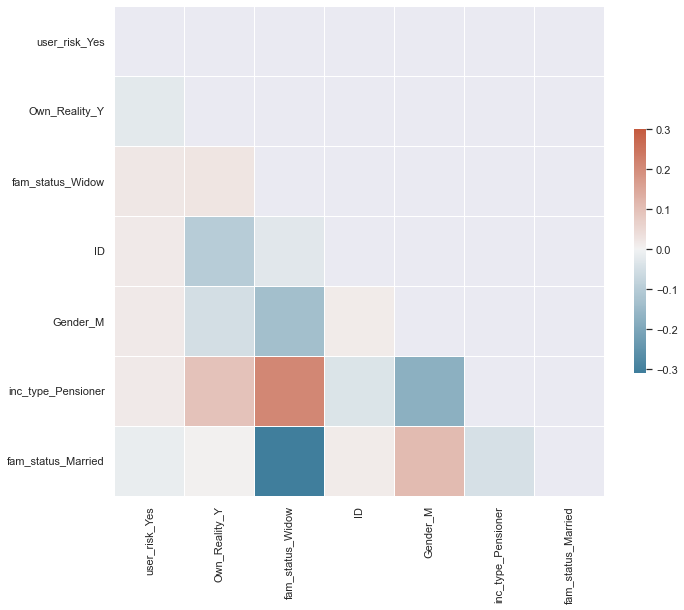

In [114]:
corr_matrix= features.corr()
corr_matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

> This heatmap shows most of the columns have strong correlation except a few 1 or 2 with dark blue color

In [116]:
features.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   user_risk_Yes       36457 non-null  uint8
 1   Own_Reality_Y       36457 non-null  uint8
 2   fam_status_Widow    36457 non-null  uint8
 3   ID                  36457 non-null  int64
 4   Gender_M            36457 non-null  uint8
 5   inc_type_Pensioner  36457 non-null  uint8
 6   fam_status_Married  36457 non-null  uint8
dtypes: int64(1), uint8(6)
memory usage: 783.3 KB


In [117]:
features

,user_risk_Yes,Own_Reality_Y,fam_status_Widow,ID,Gender_M,inc_type_Pensioner,fam_status_Married
0,0,1,0,5008804,1,0,0
1,0,1,0,5008805,1,0,0
2,0,1,0,5008806,1,0,1
3,0,1,0,5008808,0,0,0
4,0,1,0,5008809,0,0,0
...,...,...,...,...,...,...,...
36452,1,1,0,5149828,1,0,1
36453,1,1,0,5149834,0,0,1
36454,1,1,0,5149838,0,1,1
36455,1,1,0,5150049,0,0,1


In [119]:
features.describe()

,user_risk_Yes,Own_Reality_Y,fam_status_Widow,ID,Gender_M,inc_type_Pensioner,fam_status_Married
count,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000
mean,0.016897,0.672189,0.042022,5.078227e+06,0.329895,0.168747,0.687056
std,0.128886,0.469422,0.200642,4.187524e+04,0.470181,0.374533,0.463698
min,0.000000,0.000000,0.000000,5.008804e+06,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,5.042028e+06,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,5.074614e+06,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,5.115396e+06,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,5.150487e+06,1.000000,1.000000,1.000000


In [120]:
#This transformer should be used to encode target values, i.e. y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)

#### RandomUnderSampler
> The RandomUnderSampler is used to address class imbalance by randomly removing some of the samples from the majority class in order to balance the class distribution.

> The idea is to reduce the number of samples in the majority class to match the number of samples in the minority class, thus creating a balanced dataset with equal representation of all classes. This can be done by randomly selecting a subset of samples from the majority class without replacement, meaning that each selected sample is removed from the dataset, until the desired class distribution is achieved.

In [121]:
rus = RandomUnderSampler(random_state=42, replacement=True)
feature_rs,target_rs=rus.fit_resample(features,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(target_rs)))

The number of classes before fit Counter({0: 34681, 1: 1776})
The number of classes after fit Counter({0: 1776, 1: 1776})


### Splitting the data

> The data is splitted into training and testing set in 7:3 ratio

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.3, random_state=42)


In [102]:
X_train.shape, y_train.shape


((25519, 7), (25519,))

In [103]:
X_test.shape, y_test.shape


((10938, 7), (10938,))

In [104]:
#dictionary model to store accuracy of each model
model_accuracy={}

### Model Evaluation

> Afer selecting the models, traine the models using X_train and y_train .Later tested them on testing set.The accuracy , precision , recall and, F1 score are calculated after applying cross_validation _score.

#### 1. LGBMClassifier :- 

The LGBMClassifier is a classifier implementation of the LightGBM algorithm, which is a popular gradient boosting framework for machine learning tasks. LightGBM is known for its efficiency and ability to handle large datasets with high-dimensional features.

In [ ]:
# https://thecleverprogrammer.com/2021/01/15/lightgbm-in-machine-learning/
# LightGBM Classifier with optimum paramteres
lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=40, 
                            colsample_bytree=0.6) 
lgbm_tuned.fit(X_train, y_train)

#Predicting X_test to find the solutiın
y_predict = lgbm_tuned.predict(X_test)

# Evaluate the model using confusion matrix
confusion_mat = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_predict)
print("Classification Report:")
print(classification_rep)

# Perform cross-validation and evaluate the model using multiple metrics
cv_scores = cross_val_score(lgbm_tuned, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())
model_accuracy.update(LGBMClassifier = cv_scores.mean())
print("Mean CV Precision: ", cross_val_score(lgbm_tuned, X, y, cv=5, scoring='precision_macro').mean())
print("Mean CV Recall: ", cross_val_score(lgbm_tuned, X, y, cv=5, scoring='recall_macro').mean())
print("Mean CV F1-score: ", cross_val_score(lgbm_tuned, X, y, cv=5, scoring='f1_macro').mean())


#### 2. LogisticRegression :-

It is a popular classifier implementation in Python that is used for binary classification tasks. It uses the logistic regression algorithm to model the probability of an input sample belonging to a certain class

In [106]:

model = LogisticRegression(C=0.8,
                           random_state=43,
                           solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

confusion_mat=confusion_matrix(y_test, y_predict)
confusion_mat
classification_rep = classification_report(y_test, y_predict)
# Evaluate the model using confusion matrix
confusion_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation and evaluate the model using multiple metrics
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())
model_accuracy.update(LogisticRegression = cv_scores.mean())

print("Mean CV Precision: ", cross_val_score(model, X, y, cv=5, scoring='precision_macro').mean())
print("Mean CV Recall: ", cross_val_score(model, X, y, cv=5, scoring='recall_macro').mean())
print("Mean CV F1-score: ", cross_val_score(model, X, y, cv=5, scoring='f1_macro').mean())



Confusion Matrix:
[[10384     0]
 [  554     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10384
           1       0.00      0.00      0.00       554

    accuracy                           0.95     10938
   macro avg       0.47      0.50      0.49     10938
weighted avg       0.90      0.95      0.92     10938

Cross-Validation Scores:
[0.97106418 0.95117937 0.95130983 0.95130983 0.95130983]
Mean CV Accuracy:  0.9552346113412542
Mean CV Precision:  0.5737919759846193
Mean CV Recall:  0.5421670284065645
Mean CV F1-score:  0.547221214905585


#### 3. RandomForestClassifier :-

It is a popular classifier implementation in Python that is used for both binary and multi-class classification tasks. It is an ensemble method that combines multiple decision trees to make predictions.



In [107]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=14)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_predict = model.predict(X_test)

# Evaluate the model using confusion matrix
confusion_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(confusion_mat)

# Evaluate the model using classification report
classification_rep = classification_report(y_test, y_predict)
print("Classification Report:")
print(classification_rep)

# Perform cross-validation and evaluate the model using multiple metrics
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())
model_accuracy.update(RandomForestClassifier = cv_scores.mean())
print("Mean CV Precision: ", cross_val_score(model, X, y, cv=5, scoring='precision_macro').mean())
print("Mean CV Recall: ", cross_val_score(model, X, y, cv=5, scoring='recall_macro').mean())
print("Mean CV F1-score: ", cross_val_score(model, X, y, cv=5, scoring='f1_macro').mean())

Confusion Matrix:
[[10382     2]
 [  546     8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10384
           1       0.80      0.01      0.03       554

    accuracy                           0.95     10938
   macro avg       0.88      0.51      0.50     10938
weighted avg       0.94      0.95      0.93     10938

Cross-Validation Scores:
[1.         0.99986286 1.         1.         0.99986284]
Mean CV Accuracy:  0.9999451416029788
Mean CV Precision:  0.9999567557176554
Mean CV Recall:  0.9997183098591549
Mean CV F1-score:  0.9998521447776764


#### 4. CatBoostClassifier:-

It is a popular gradient boosting classifier implementation in Python that is known for its ability to handle categorical features directly without the need for extensive data preprocessing. It is particularly well-suited for tasks with high-dimensional categorical features and can be used for both binary and multi-class classification tasks.

In [129]:

# Create CatBoostClassifier with initial hyperparameters
model = CatBoostClassifier(iterations=50,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5) # Perform 5-fold cross-validation
print("Cross-validation scores: ", cv_scores)
print("Mean CV accuracy: ", cv_scores.mean())

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Evaluate the model performance
print('CatBoost Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
model_accuracy.update(CatBoostClassifier = accuracy_score(y_test, y_predict))

print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


0:	learn: 0.1589560	total: 5.38ms	remaining: 263ms
25:	learn: 0.0004766	total: 17.1s	remaining: 15.8s
49:	learn: 0.0002716	total: 42s	remaining: 0us
0:	learn: 0.1606688	total: 4.29ms	remaining: 210ms
25:	learn: 0.0003396	total: 21s	remaining: 19.4s
49:	learn: 0.0001747	total: 42.3s	remaining: 0us
0:	learn: 0.1591380	total: 3.77ms	remaining: 185ms
25:	learn: 0.0006281	total: 18.6s	remaining: 18.6s
49:	learn: 0.0003434	total: 49.6s	remaining: 0us
0:	learn: 0.1598576	total: 4.42ms	remaining: 217ms
25:	learn: 0.0005609	total: 17s	remaining: 15.7s
49:	learn: 0.0003228	total: 46.7s	remaining: 0us
0:	learn: 0.1596006	total: 4.84ms	remaining: 237ms
25:	learn: 0.0006474	total: 19.6s	remaining: 19.6s
49:	learn: 0.0003937	total: 56.8s	remaining: 0us
Cross-validation scores:  [1. 1. 1. 1. 1.]
Mean CV accuracy:  1.0
0:	learn: 0.5452318	total: 1.59ms	remaining: 77.8ms
25:	learn: 0.1606370	total: 1.57s	remaining: 1.45s
49:	learn: 0.1463138	total: 4.15s	remaining: 0us
CatBoost Accuracy Score is 0.9501

#### 5. XGBoost Classifier :-

It is a popular gradient boosting classifier implementation in Python that is known for its high performance and ability to handle a wide range of machine learning tasks, including binary and multi-class classification, as well as regression.


In [126]:
# Create XGBClassifier 
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_predict = model.predict(X_test)

# Evaluate the model using confusion matrix
confusion_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(confusion_mat)

# Evaluate the model using classification report
classification_rep = classification_report(y_test, y_predict)
print("Classification Report:")
print(classification_rep)
model_accuracy.update(XGBClassifier = accuracy_score(y_test, y_predict))


Confusion Matrix:
[[10364    20]
 [  350   204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10384
           1       0.91      0.37      0.52       554

    accuracy                           0.97     10938
   macro avg       0.94      0.68      0.75     10938
weighted avg       0.96      0.97      0.96     10938



In [130]:
model_accuracy

{'LGBMClassifier': 0.9512850776056535,
 'LogisticRegression': 0.9552346113412542,
 'RandomForestClassifier': 0.9999451416029788,
 'CatBoostClassifier': 0.9501737063448528,
 'XGBClassifier': 0.9661729749497165}

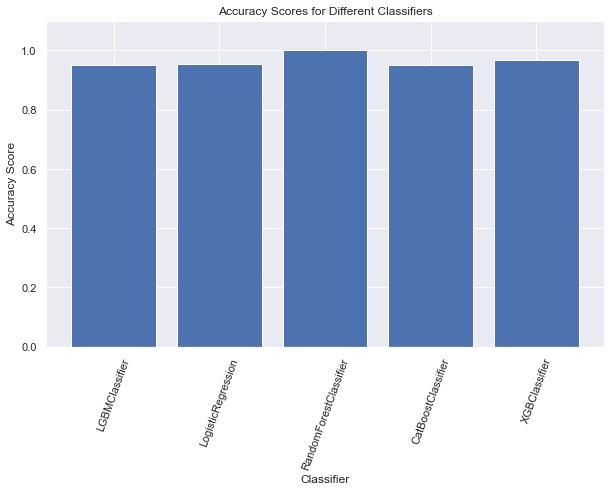

In [136]:
# Data
scores = model_accuracy

# Convert dictionary to lists
classifiers = list(scores.keys())
accuracy_scores = list(scores.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores)
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.xlabel('Classifier')
plt.xticks(rotation=70)

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classifiers')
plt.show()


> The accuracy of training data set is good and RandomForestClassifier has best compared to others in our dataset